#Laboratorio Nº2

Notebook correspondiente al Laboratorio Nº2 de la asignatura "IC324 Señales y Sistemas". 

Se contempla la actividad 1 y 2.

* En primera instancia, se procede con la importación de las dependencias. Luego, se realiza la carga del archivo de audio en formato wav ("hornero.wav", propuesto por la cátedra).

* **Actividad 1: Muestreo y efectos en el audio**. Permite la reprodución del audio en distintas frecuencias de muestreo, para así analizar qué fenómeno ocurre.

* **Actividad 2: Ecos y Transformada Z**. En la sección 'Ecos' se implementa de manera "manual" el efecto de eco en el audio (a través de la concatenación de distintos arreglos). 

  Conociendo el diagrama de simulación, la ecuación a diferencias y  la función de transferencia que representa dicho fenómeno, se propone al estudiante construir dicha función (numerador y denominador) a través del método `lfilter` de Scipy, y así filtrar la señal de audio.

##Importación de dependencias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size' : 14})

from scipy.io import wavfile # Permite leer y grabar audio
from IPython.display import Audio # Permite reproducir el audio

from scipy.signal import lfilter

##Carga del archivo de audio

Se utiliza `wavfile.read(AudioName)`, que retorna:
* rate --> Frecuencia de muestreo del audio
* data --> Array de Numpy. Señal de audio (int16)


Para más información, recurrir a la [documentación](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html#scipy-io-wavfile-read).

In [ ]:
AudioName = "hornero.wav" # Archivo de Audio

fs, Audiodata = wavfile.read(AudioName)

duracion = Audiodata.shape[0]/fs

print(f'Duracion = {duracion} , Frecuencia de Muestreo = {fs} [Muestras/Seg]' \
      f', Wav format = {Audiodata.dtype}')

Duracion = 11.242666666666667 , Frecuencia de Muestreo = 48000 [Muestras/Seg], Wav format = int16


In [ ]:
dt = 1/fs                                    # Tiempo entre muestras
t = np.arange(0, duracion, dt)               # Se genera el vector tiempo
x = Audiodata[:,0]                           # Esto se hace ya que Audiodata tiene 2 columnas (2 canales!)

##Actividad Nº1: Muestreo y efectos en el audio

###Reprodución con distintas tasas de muestreo

Con tasa de muestreo original:

In [ ]:
Audio(x, rate=fs)

Utiliza el doble de la tasa de muestreo y escucha qué pasa:

Y ahora con la mitad de la tasa de muestreo:

###Gráfica del audio en el tiempo

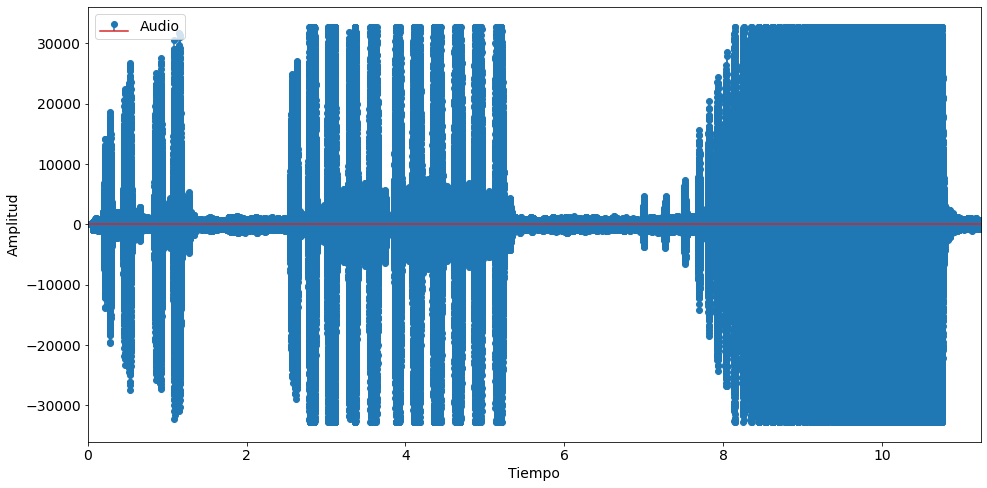

In [ ]:
plt.stem(t,x,label='Audio', use_line_collection=True)
plt.xlim(t[0],t[-1])
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

Ventana para visulaizar la señal de forma discreta:

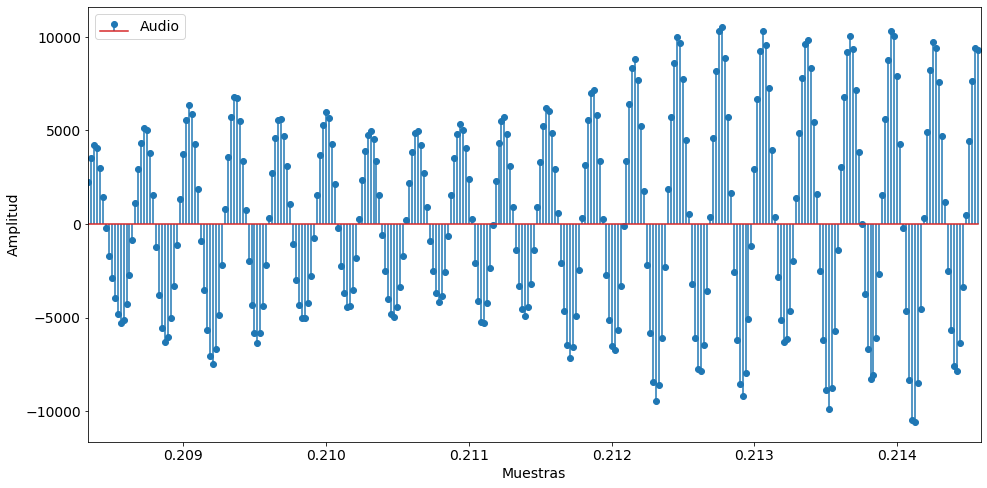

In [ ]:
INICIO = 10000
FIN = 10300                                                                 # Limite 539647

plt.stem(t[INICIO:FIN],x[INICIO:FIN],label='Audio', use_line_collection=True)
plt.xlim(t[INICIO],t[FIN])
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

##Actividad Nº2: Ecos y Transformada Z

Ingresa las constantes a utilizar:

In [ ]:
#N =    # Numero de muestras usado para cada atraso

#A =    # Ganancia (o atenuación) del primer atraso 
#B =    # Ganancia (o atenuación) del segundo atraso 

Se genera un [arreglo de ceros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy-zeros) de tamaño N

In [ ]:
zeros = np.zeros(N)

###Ecos

Se generan 3 señales: 
* `Uno` -> Original (a la cual se añaden ceros para tener el mismo tamaño que las siguientes) 
* `Dos`-> Señal atenuada y con 1 atraso
* `Tres` -> Señal atenuada y con 2 atrasos 

In [ ]:
uno = np.concatenate((x, zeros, zeros), axis=0)           # Señal original
dos = np.concatenate((zeros, A * x, zeros), axis=0)       # Señal con 1 atraso
tres = np.concatenate((zeros, zeros, B * x), axis=0)      # Señal con 2 atrasos

Gráficas de las señales generadas:

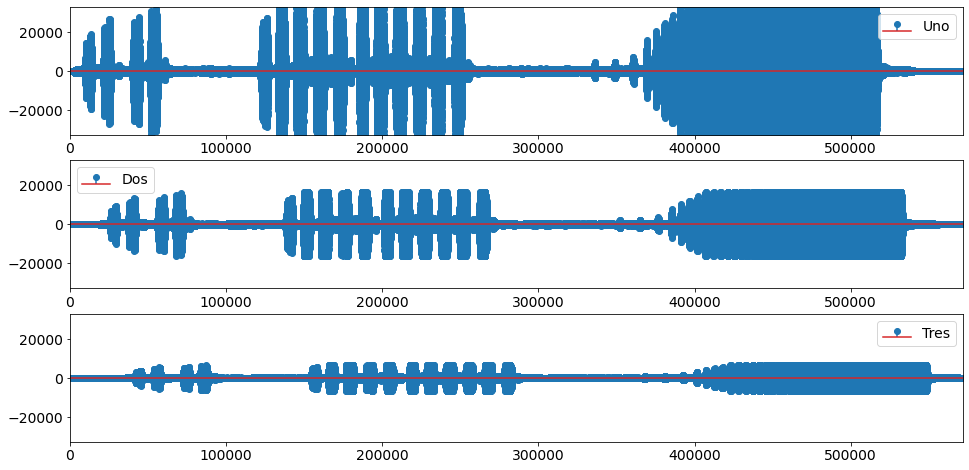

In [ ]:
n = np.arange(len(uno))

figura, axs = plt.subplots(3,1)

plt.sca(axs[0])
plt.stem(n,uno,label='Uno', use_line_collection=True)
plt.xlim(n[0],n[-1])
plt.ylim(uno.min(), uno.max())
plt.legend()

plt.sca(axs[1])
plt.stem(n,dos,label='Dos', use_line_collection=True)
plt.xlim(n[0],n[-1])
plt.ylim(uno.min(), uno.max())
plt.legend()

plt.sca(axs[2])
plt.stem(n,tres,label='Tres', use_line_collection=True)
plt.xlim(n[0],n[-1])
plt.ylim(uno.min(), uno.max())
plt.legend()

plt.show()


Ahora se suma la señal con su versión atrasada N y 2xN (simil ECO), obteniendo así la señal con 2 ecos:

In [ ]:
y_ecos = uno + dos + tres

In [ ]:
Audio(y_ecos, rate=fs)

###Transformada Z

####Creación de la función de Transferencia Z

Conociendo el diagrama de simulación del eco y la ecuación a diferencias, habrás obtenido una función de transferencia con la siguiente estructura:


$$H(z)=\frac{b_{0}+b_{1}z^{-1}+b_{2}z^{-2}+...+b_{M-1}z^{-M-1}+b_{M}z^{-M}}{1}$$


El método `lfilter` que se utilizará para aplicar el filtro a la señal (se recomienda leer la documentación: [scipy.signal.lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html)), necesita de dos arreglos:
* El numerador `b` (en nuestro código los llamamos `num`)
* El denominador `a` (los llamamos `den`). 

Cada elemento del arreglo corresponde al valor del coeficiente que acompaña a cada término de z:

$$b[0] + b[1]z^{-1} + ... + b[M]z^{-M}$$

Es decir:
* b[0] corresponde al coeficiente que acompaña a $z^{0}$
* b[1] corresponde al coeficiente que acompaña a $z^{-1}$
* b[M] corresponde al coeficiente que acompaña a $z^{-M}$





In [ ]:
num = np.zeros(1+2*N) # Para dar el tamaño necesario del numerador

In [ ]:
den = np.array([1,])

Comprendiendo el funcionamiento del método `lfilter`, se propone asignar los elementos corespondientes del arreglo `num`:

In [ ]:
# Recorda que la asignación de un elemento es de la forma     num[i]=4.3

####Aplicación de la transformada Z a la señal x

In [ ]:
x_2 = np.concatenate((x, np.zeros(2*N)), axis=0) # Esto se hace ya que el output de lfilter tiene la misma dimensión que la señal input

In [ ]:
y_filter = lfilter(num,den,x_2)

In [ ]:
Audio(y_filter, rate=fs)

###Ecos vs Transformada Z

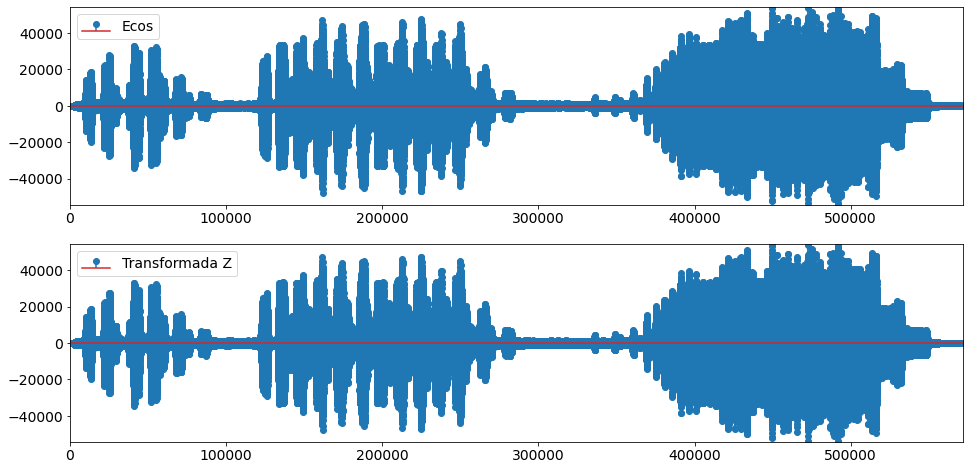

In [ ]:
figura, axs = plt.subplots(2,1)

plt.sca(axs[0])
plt.stem(n,y_ecos,label='Ecos', use_line_collection=True)
plt.xlim(n[0],n[-1])
plt.ylim(y_ecos.min(), y_ecos.max())
plt.legend()

n_filter = np.arange(len(x_2))
plt.sca(axs[1])
plt.stem(n_filter,y_filter,label='Transformada Z', use_line_collection=True)
plt.xlim(n_filter[0],n_filter[-1])
plt.ylim(y_filter.min(), y_filter.max())
plt.legend()

plt.show()

Programación: Rodriguez, Mariano David.
Becario de Señales y Sistemas (IC 324)
Facultad de Ingeniería - Oberá
Universidad Nacional de Misiones